   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Adding Multiple Indicators)


In [7]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "4H"
NUM_FEATURES = 0

In [10]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_ASK_1H_14F.csv
EURUSD_FULL_1D_20F.csv
EURUSD_FULL_1D_26F.csv
EURUSD_FULL_1H_20F.csv
EURUSD_FULL_1M_20F.csv
EURUSD_FULL_4H_20F.csv
EURUSD_FULL_4H_26F.csv


## Read CSV

### Read Dataset From Regression

In [11]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[6], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

                 Gmt time     Open     High      Low    Close       Volume  \
0     2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998   
1     2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001   
2     2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001   
3     2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003   
4     2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999   
...                   ...      ...      ...      ...      ...          ...   
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...           AQ

### Add EMA Function

In [12]:
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(com=0.5).mean(), name = 'EMA_Close_' + str(n))
    df = df.join(EMA)  
    return df

In [13]:
DATASET_FULL = EMA(DATASET_FULL, 5)
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175,MA_Close_200,EMA_Close_5
0,2004-01-01 00:00:00,1.25950,1.25965,1.25826,1.25869,19408.8998,1.25934,1.25953,1.25814,1.25854,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.258690
1,2004-01-01 04:00:00,1.25908,1.25960,1.24698,1.25910,41634.6001,1.25898,1.25948,1.24679,1.25900,...,0.000326,0.000326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.258997
2,2004-01-01 08:00:00,1.25900,1.25953,1.25723,1.25785,23757.6001,1.25884,1.25938,1.25709,1.25775,...,-0.000993,-0.000667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.258203
3,2004-01-01 12:00:00,1.25785,1.26052,1.25727,1.25911,25753.3003,1.25775,1.26035,1.25710,1.25897,...,0.001002,0.000335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.258815
4,2004-01-01 16:00:00,1.25905,1.25968,1.25371,1.25461,234854.4999,1.25890,1.25958,1.25357,1.25451,...,-0.003574,-0.003239,1.257872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.256000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26489,2020-05-29 08:00:00,1.11051,1.11420,1.10962,1.11354,74257.9698,1.11049,1.11417,1.10959,1.11352,...,0.002701,-0.046517,1.109608,1.099484,1.096588,1.089995,1.089209,1.088126,1.088011,1.112307
26490,2020-05-29 12:00:00,1.11355,1.11452,1.10944,1.11070,113196.9590,1.11354,1.11451,1.10940,1.11067,...,-0.002550,-0.049067,1.110318,1.100257,1.096905,1.090311,1.089386,1.088284,1.088100,1.111236
26491,2020-05-29 16:00:00,1.11069,1.11112,1.10811,1.10998,54751.2294,1.11067,1.11111,1.10809,1.10997,...,-0.000648,-0.049716,1.110750,1.101074,1.097231,1.090596,1.089549,1.088436,1.088193,1.110399
26492,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,...,0.000658,-0.049058,1.111094,1.101916,1.097593,1.090874,1.089735,1.088581,1.088292,1.110606


In [14]:
DATASET_FULL['EMA_Close_5'].describe()

count    26494.000000
mean         1.264036
std          0.122813
min          1.037959
25%          1.149870
50%          1.270515
75%          1.350774
max          1.598615
Name: EMA_Close_5, dtype: float64

In [15]:
DATASET_FULL['EMA_Close_5'].isnull().sum()

0

(26494, 27)


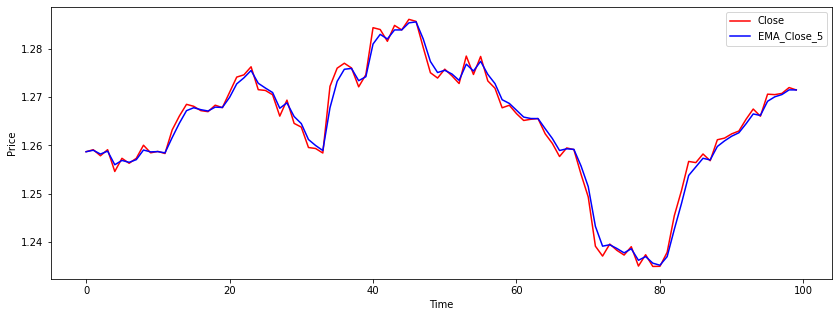

In [16]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['EMA_Close_5'][INICIO:FIN], color = 'blue', label = 'EMA_Close_5')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

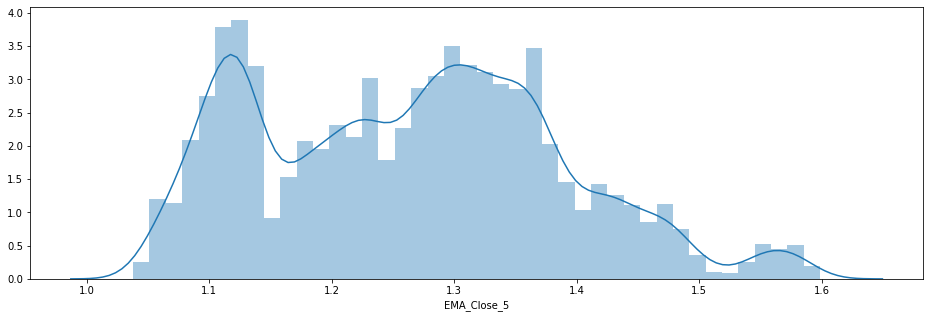

In [17]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['EMA_Close_5']);

### MOM Function

In [18]:
#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

In [19]:
DATASET_FULL = MOM(DATASET_FULL, 1)
DATASET_FULL = MOM(DATASET_FULL, 2)
DATASET_FULL = MOM(DATASET_FULL, 3)
DATASET_FULL = MOM(DATASET_FULL, 4)
DATASET_FULL = MOM(DATASET_FULL, 5)
DATASET_FULL = MOM(DATASET_FULL, 6)
DATASET_FULL = MOM(DATASET_FULL, 7)
DATASET_FULL = MOM(DATASET_FULL, 8)
DATASET_FULL = MOM(DATASET_FULL, 9)
DATASET_FULL = MOM(DATASET_FULL, 10)
DATASET_FULL = MOM(DATASET_FULL, 11)
DATASET_FULL = MOM(DATASET_FULL, 12)
DATASET_FULL = MOM(DATASET_FULL, 13)
DATASET_FULL = MOM(DATASET_FULL, 14)
DATASET_FULL = MOM(DATASET_FULL, 15)
DATASET_FULL = MOM(DATASET_FULL, 25)
DATASET_FULL = MOM(DATASET_FULL, 36)
DATASET_FULL = MOM(DATASET_FULL, 50)
DATASET_FULL = MOM(DATASET_FULL, 75)
DATASET_FULL = MOM(DATASET_FULL, 80)
DATASET_FULL = MOM(DATASET_FULL, 100)
print(DATASET_FULL)

                 Gmt time     Open     High      Low    Close       Volume  \
0     2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998   
1     2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001   
2     2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001   
3     2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003   
4     2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999   
...                   ...      ...      ...      ...      ...          ...   
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Momentum_12

In [20]:
print(DATASET_FULL['Momentum_5'].describe())
print(DATASET_FULL['Momentum_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Momentum_5'].isnull().sum())

count    26489.000000
mean        -0.000028
std          0.006815
min         -0.051770
25%         -0.003560
50%          0.000030
75%          0.003600
max          0.054590
Name: Momentum_5, dtype: float64
5
0


In [21]:
print(DATASET_FULL['Momentum_100'].isnull().sum())

0


(26494, 48)


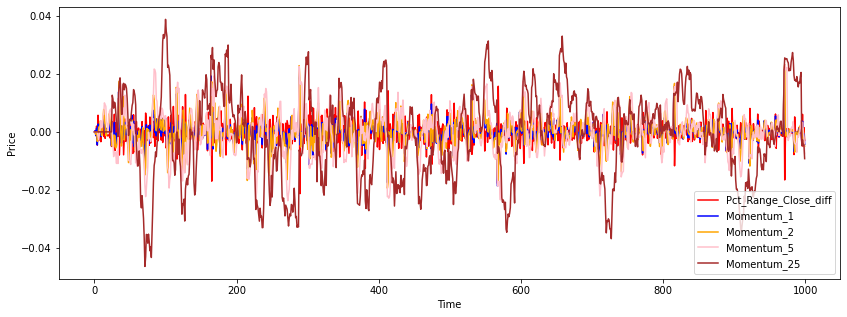

In [22]:
INICIO = 0
FIN = 1000
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Pct_Range_Close_diff'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Momentum_1'][INICIO:FIN], color = 'blue', label = 'Momentum_1')
pyplot.plot(DATASET_FULL['Momentum_2'][INICIO:FIN], color = 'orange', label = 'Momentum_2')
pyplot.plot(DATASET_FULL['Momentum_5'][INICIO:FIN], color = 'pink', label = 'Momentum_5')
pyplot.plot(DATASET_FULL['Momentum_25'][INICIO:FIN], color = 'brown', label = 'Momentum_25')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

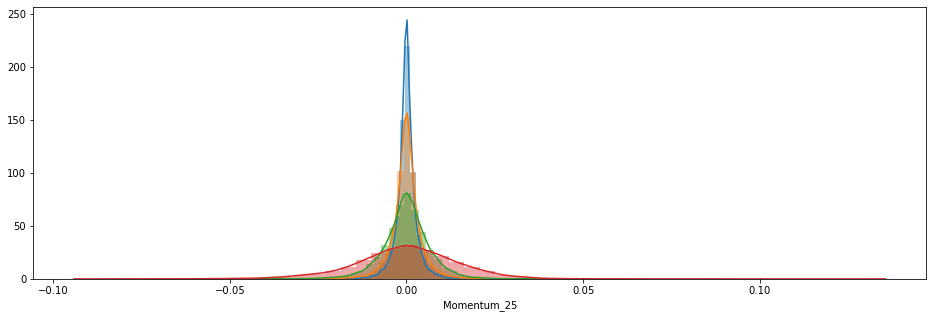

In [23]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Momentum_1']);
sns.distplot(DATASET_FULL['Momentum_2']);
sns.distplot(DATASET_FULL['Momentum_5']);
sns.distplot(DATASET_FULL['Momentum_25']);


In [24]:
def get_rsi(df, n=14):
    deltas = (df['Close']-df['Close'].shift(1)).fillna(0)

    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1
    df['rsi'+'_'+str(n)] = rsi_series /100
    return df

In [25]:
DATASET_FULL = get_rsi(DATASET_FULL, 5)

In [26]:
DATASET_FULL = get_rsi(DATASET_FULL, 14)

In [27]:
DATASET_FULL = get_rsi(DATASET_FULL, 25)
DATASET_FULL = get_rsi(DATASET_FULL, 50)
DATASET_FULL = get_rsi(DATASET_FULL, 70)

In [28]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Momentum_36,Momentum_50,Momentum_75,Momentum_80,Momentum_100,rsi_5,rsi_14,rsi_25,rsi_50,rsi_70
0,2004-01-01 00:00:00,1.25950,1.25965,1.25826,1.25869,19408.8998,1.25934,1.25953,1.25814,1.25854,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004-01-01 04:00:00,1.25908,1.25960,1.24698,1.25910,41634.6001,1.25898,1.25948,1.24679,1.25900,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2004-01-01 08:00:00,1.25900,1.25953,1.25723,1.25785,23757.6001,1.25884,1.25938,1.25709,1.25775,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2004-01-01 12:00:00,1.25785,1.26052,1.25727,1.25911,25753.3003,1.25775,1.26035,1.25710,1.25897,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2004-01-01 16:00:00,1.25905,1.25968,1.25371,1.25461,234854.4999,1.25890,1.25958,1.25357,1.25451,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26489,2020-05-29 08:00:00,1.11051,1.11420,1.10962,1.11354,74257.9698,1.11049,1.11417,1.10959,1.11352,...,0.01836,0.02059,0.02969,0.02865,0.03362,0.915774,0.768156,0.702721,0.634166,0.602172
26490,2020-05-29 12:00:00,1.11355,1.11452,1.10944,1.11070,113196.9590,1.11354,1.11451,1.10940,1.11067,...,0.01572,0.01585,0.02302,0.02440,0.03163,0.665965,0.685124,0.656376,0.611361,0.586551
26491,2020-05-29 16:00:00,1.11069,1.11112,1.10811,1.10998,54751.2294,1.11067,1.11111,1.10809,1.10997,...,0.01504,0.01630,0.02633,0.02492,0.02854,0.612976,0.665484,0.645139,0.605726,0.582664
26492,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,...,0.01721,0.01812,0.02918,0.02612,0.02776,0.648428,0.675637,0.651441,0.609450,0.585490


(26494, 53)


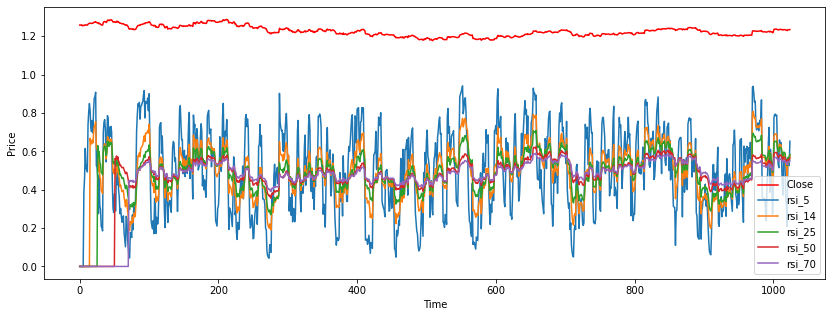

In [29]:
INICIO = 0
FIN = 1025
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['rsi_5'][INICIO:FIN], label = 'rsi_5')
pyplot.plot(DATASET_FULL['rsi_14'][INICIO:FIN], label = 'rsi_14')
pyplot.plot(DATASET_FULL['rsi_25'][INICIO:FIN], label = 'rsi_25')
pyplot.plot(DATASET_FULL['rsi_50'][INICIO:FIN], label = 'rsi_50')
pyplot.plot(DATASET_FULL['rsi_70'][INICIO:FIN], label = 'rsi_70')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
print(DATASET_FULL['rsi_5'].describe())
print(DATASET_FULL['rsi_5'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
print(DATASET_FULL['rsi_5'].isnull().sum())

count    26494.000000
mean         0.500411
std          0.210545
min          0.000000
25%          0.337296
50%          0.503409
75%          0.663545
max          0.989707
Name: rsi_5, dtype: float64
0
0


In [31]:
#Bollinger Bands  
def BBANDS(df, n):  
    no_of_std = 1.5
    MA = pd.Series(pd.Series(df['Close'].rolling(n).mean()))  
    MSD = pd.Series(pd.Series(df['Close'].rolling(n).std()))  
    
    
    df['Rolling_Mean'+ str(n)] = MA
    df['Bollinger_High'] = MA + (MSD * no_of_std)
    df['Bollinger_Low'] = MA - (MSD * no_of_std)
    
    return df

In [32]:
DATASET_FULL = BBANDS(DATASET_FULL, 25)
#DATASET_FULL = BBANDS(DATASET_FULL, 25)
print(DATASET_FULL.tail(5))

                 Gmt time     Open     High      Low    Close       Volume  \
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Momentum_80  Momentum_100  \
26489   1.11049   1.11417  1.10959    1.11352  ...      0.02865       0.03362   
26490   1.11354   1.11451  1.10940    1.11067  ...      0.02440       0.03163   
26491   1.11067   1.11111  1.10809    1.10997  ...      0.02492       0.02854   
26492   1.10993   1.11085  1.10979    1.11036  ...      0.02612       0.02776   
26493   1.11129   1.11195  1.11023    1.11156  ...      0.02648       0.02792   

          rsi_5    rsi_14    rsi_25    rsi_5

In [33]:
print(DATASET_FULL['Rolling_Mean25'].describe())
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())

count    26470.000000
mean         1.264107
std          0.122681
min          1.041983
25%          1.149253
50%          1.271260
75%          1.351119
max          1.589822
Name: Rolling_Mean25, dtype: float64
24
0


In [34]:
print(DATASET_FULL['Bollinger_High'].describe())
print(DATASET_FULL['Bollinger_High'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_High'].isnull().sum())

count    26494.000000
mean         1.272239
std          0.123994
min          1.045626
25%          1.157441
50%          1.279578
75%          1.358922
max          1.604083
Name: Bollinger_High, dtype: float64
0
0


In [35]:
print(DATASET_FULL['Bollinger_Low'].describe())
print(DATASET_FULL['Bollinger_Low'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_Low'].isnull().sum())

count    26494.000000
mean         1.255974
std          0.121446
min          1.035549
25%          1.143006
50%          1.261787
75%          1.342867
max          1.583272
Name: Bollinger_Low, dtype: float64
0
0


(26494, 56)


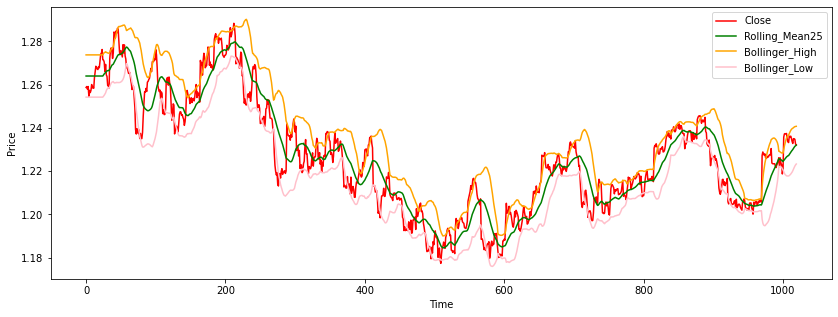

In [36]:
INICIO = 0
FIN = 1020
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Rolling_Mean25'][INICIO:FIN], color = 'green', label = 'Rolling_Mean25')
pyplot.plot(DATASET_FULL['Bollinger_High'][INICIO:FIN], color = 'orange', label = 'Bollinger_High')
pyplot.plot(DATASET_FULL['Bollinger_Low'][INICIO:FIN], color = 'pink', label = 'Bollinger_Low')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

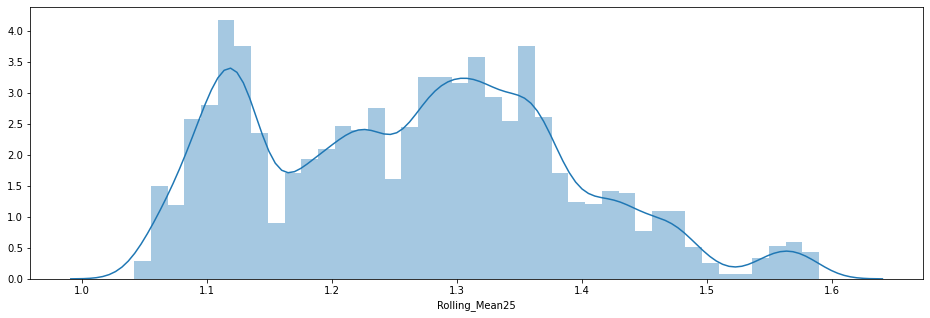

In [37]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Rolling_Mean25']);

In [38]:
#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO_k')  
    df = df.join(SOk)  
    return df

In [39]:
DATASET_FULL = STOK(DATASET_FULL)
print(DATASET_FULL.tail(5))

                 Gmt time     Open     High      Low    Close       Volume  \
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Momentum_100     rsi_5  \
26489   1.11049   1.11417  1.10959    1.11352  ...       0.03362  0.915774   
26490   1.11354   1.11451  1.10940    1.11067  ...       0.03163  0.665965   
26491   1.11067   1.11111  1.10809    1.10997  ...       0.02854  0.612976   
26492   1.10993   1.11085  1.10979    1.11036  ...       0.02776  0.648428   
26493   1.11129   1.11195  1.11023    1.11156  ...       0.02792  0.690644   

         rsi_14    rsi_25    rsi_50    rsi_70  Rolling_Mean25 

In [40]:
print(DATASET_FULL['SO_k'].describe())
print(DATASET_FULL['SO_k'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO_k'].isnull().sum())

count    26494.000000
mean         0.502386
std          0.282742
min          0.000000
25%          0.252804
50%          0.508144
75%          0.750000
max          1.000000
Name: SO_k, dtype: float64
0
0


(26494, 57)


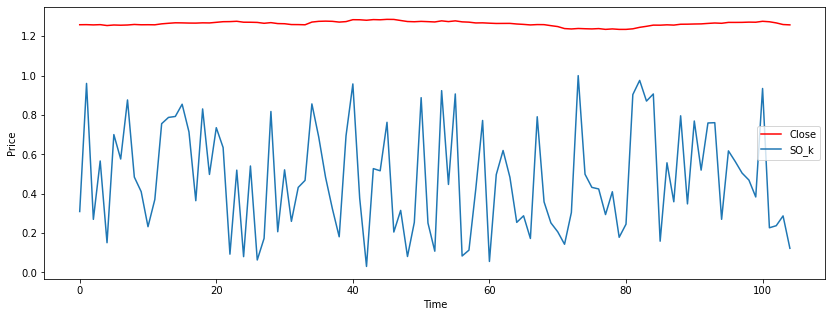

In [41]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO_k'][INICIO:FIN], label = 'SO_k')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

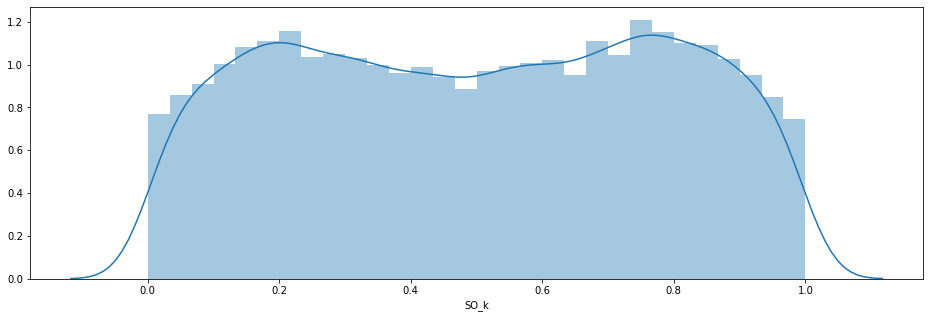

In [42]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['SO_k']);

In [43]:
# Stochastic Oscillator, EMA smoothing, nS = slowing (1 if no slowing)  
def STO(df,  nK, nD, nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.ewm(ignore_na=False, span=nD, min_periods=nD-1, adjust=True).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    SOd = SOd.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  

In [44]:
DATASET_FULL = STO(DATASET_FULL,1,2)
print(DATASET_FULL.tail(5))

                 Gmt time     Open     High      Low    Close       Volume  \
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...    rsi_14    rsi_25  \
26489   1.11049   1.11417  1.10959    1.11352  ...  0.768156  0.702721   
26490   1.11354   1.11451  1.10940    1.11067  ...  0.685124  0.656376   
26491   1.11067   1.11111  1.10809    1.10997  ...  0.665484  0.645139   
26492   1.10993   1.11085  1.10979    1.11036  ...  0.675637  0.651441   
26493   1.11129   1.11195  1.11023    1.11156  ...  0.687798  0.658960   

         rsi_50    rsi_70  Rolling_Mean25  Bollinger_High  Bollinger_Low  \
26489  0.6

In [45]:
print(DATASET_FULL['SO%k1'].describe())
print(DATASET_FULL['SO%k1'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%k1'].isnull().sum())

print(DATASET_FULL['SO%d2'].describe())
print(DATASET_FULL['SO%d2'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%d2'].isnull().sum())

count    26494.000000
mean         0.502386
std          0.282742
min          0.000000
25%          0.252804
50%          0.508144
75%          0.750000
max          1.000000
Name: SO%k1, dtype: float64
0
0
count    26494.000000
mean         0.502381
std          0.197315
min          0.026950
25%          0.339270
50%          0.504988
75%          0.665530
max          0.974981
Name: SO%d2, dtype: float64
0
0


(26494, 59)


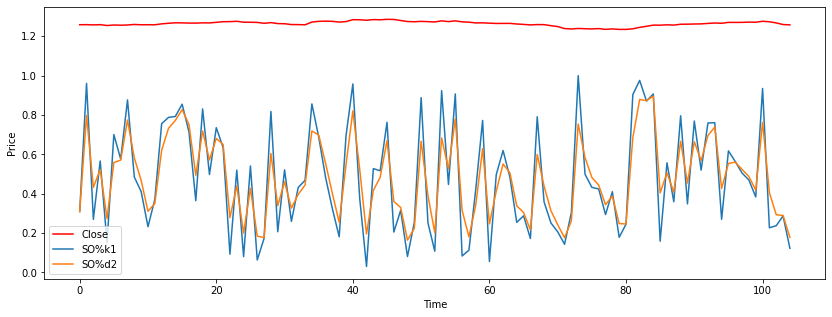

In [46]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO%k1'][INICIO:FIN], label = 'SO%k1')
pyplot.plot(DATASET_FULL['SO%d2'][INICIO:FIN], label = 'SO%d2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

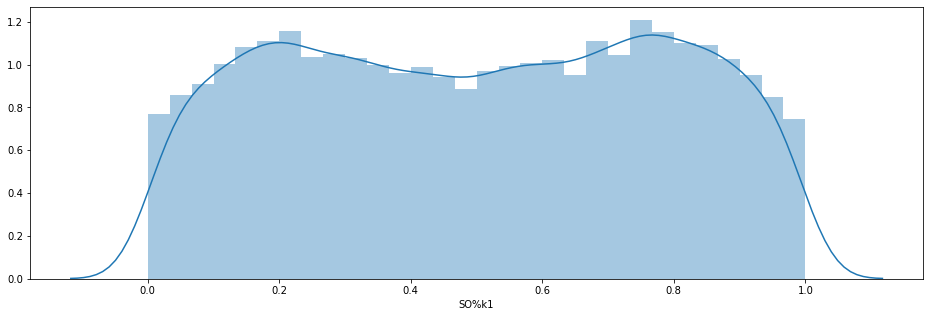

In [47]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['SO%k1']);

In [48]:
#Trix  
def TRIX(df, n):  
    EX1 = df['Close'].ewm(span = n, min_periods = n - 1).mean()
    EX2 = EX1.ewm(span = n, min_periods = n - 1).mean()  
    EX3 = EX2.ewm(span = n, min_periods = n - 1).mean()  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

In [49]:
DATASET_FULL = TRIX(DATASET_FULL,2)
DATASET_FULL = TRIX(DATASET_FULL,5)
DATASET_FULL = TRIX(DATASET_FULL,15)
DATASET_FULL = TRIX(DATASET_FULL,25)
DATASET_FULL = TRIX(DATASET_FULL,50)
DATASET_FULL = TRIX(DATASET_FULL,75)
print(DATASET_FULL.tail(5))

                 Gmt time     Open     High      Low    Close       Volume  \
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Bollinger_Low      SO_k  \
26489   1.11049   1.11417  1.10959    1.11352  ...       1.089376  0.855895   
26490   1.11354   1.11451  1.10940    1.11067  ...       1.089942  0.248031   
26491   1.11067   1.11111  1.10809    1.10997  ...       1.090928  0.621262   
26492   1.10993   1.11085  1.10979    1.11036  ...       1.092027  0.794643   
26493   1.11129   1.11195  1.11023    1.11156  ...       1.093183  0.687831   

          SO%k1     SO%d2    Trix_2    Trix_5   Trix_15 

In [50]:
print(DATASET_FULL['Trix_5'].describe())
print(DATASET_FULL['Trix_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Trix_5'].isnull().sum())

count    26485.000000
mean        -0.000005
std          0.000660
min         -0.003653
25%         -0.000370
50%          0.000009
75%          0.000375
max          0.004647
Name: Trix_5, dtype: float64
9
0


(26494, 65)


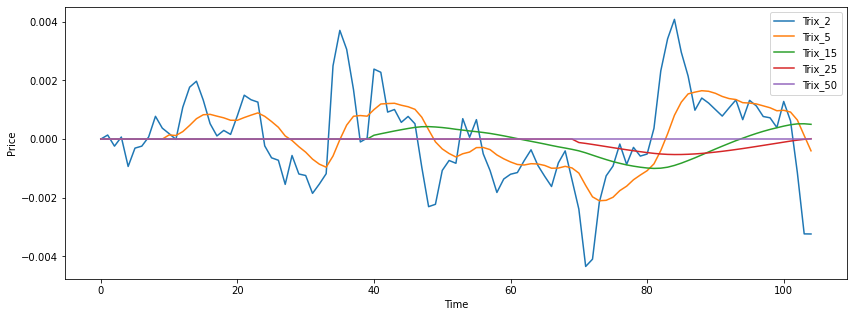

In [51]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Trix_2'][INICIO:FIN], label = 'Trix_2')
pyplot.plot(DATASET_FULL['Trix_5'][INICIO:FIN], label = 'Trix_5')
pyplot.plot(DATASET_FULL['Trix_15'][INICIO:FIN], label = 'Trix_15')
pyplot.plot(DATASET_FULL['Trix_25'][INICIO:FIN], label = 'Trix_25')
pyplot.plot(DATASET_FULL['Trix_50'][INICIO:FIN], label = 'Trix_50')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

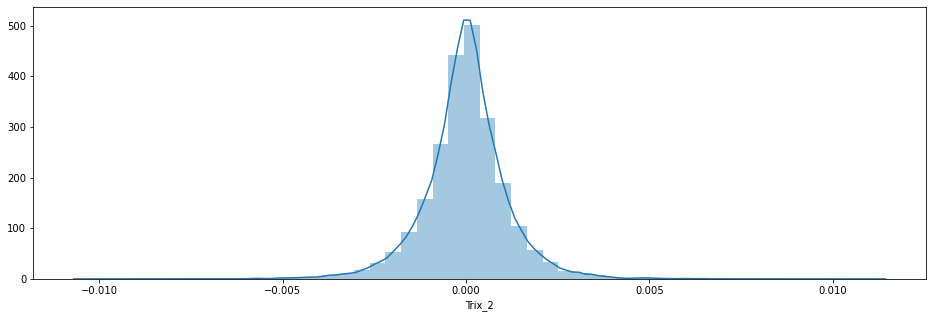

In [52]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Trix_2']);

In [53]:
#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(df['Close'].ewm(span = n_fast, min_periods = n_slow-1).mean())
    EMAslow = pd.Series(df['Close'].ewm(span = n_slow, min_periods = n_fast-1).mean())
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(MACD.ewm(span = 9, min_periods = 8).mean(), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [54]:
DATASET_FULL = MACD(DATASET_FULL,5,25)
print(DATASET_FULL.tail(5))

                 Gmt time     Open     High      Low    Close       Volume  \
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...     SO%d2    Trix_2  \
26489   1.11049   1.11417  1.10959    1.11352  ...  0.806868  0.001647   
26490   1.11354   1.11451  1.10940    1.11067  ...  0.434310  0.000537   
26491   1.11067   1.11111  1.10809    1.10997  ...  0.558945 -0.000160   
26492   1.10993   1.11085  1.10979    1.11036  ...  0.716077 -0.000083   
26493   1.11129   1.11195  1.11023    1.11156  ...  0.697246  0.000222   

         Trix_5   Trix_15   Trix_25   Trix_50   Trix_75  MACD_5_25  \
26489  0.001107 

In [55]:
print(DATASET_FULL['MACD_5_25'].describe())
print(DATASET_FULL['MACD_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACD_5_25'].isnull().sum())



count    26471.000000
mean        -0.000061
std          0.005566
min         -0.030136
25%         -0.003136
50%          0.000061
75%          0.003177
max          0.050094
Name: MACD_5_25, dtype: float64
23
0


(26494, 68)


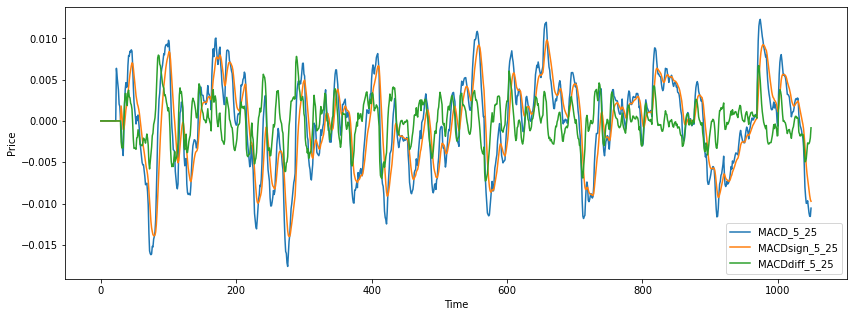

In [56]:
INICIO = 0
FIN = 1050
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['MACD_5_25'][INICIO:FIN], label = 'MACD_5_25')
pyplot.plot(DATASET_FULL['MACDsign_5_25'][INICIO:FIN], label = 'MACDsign_5_25')
pyplot.plot(DATASET_FULL['MACDdiff_5_25'][INICIO:FIN], label = 'MACDdiff_5_25')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

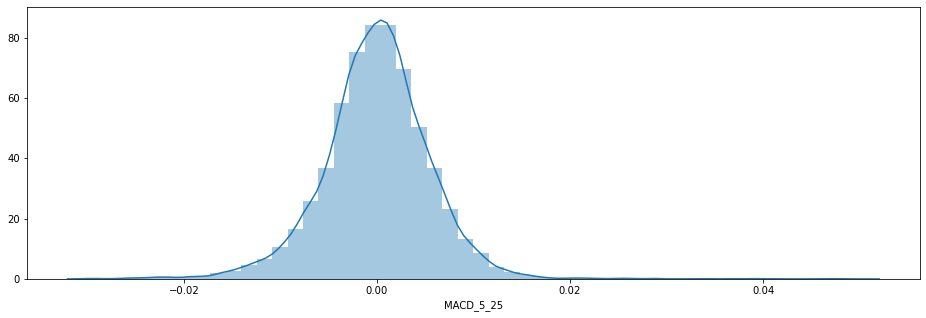

In [57]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['MACD_5_25']);

In [58]:
#Mass Index  
def MassI(df, period = 25, min_periods = 8, span=9):  
    Range = df['High'] - df['Low']  
    EX1 = Range.ewm(span = 9, min_periods = 8).mean()
    EX2 = EX1.ewm(span = 9, min_periods = 8).mean()
    Mass = EX1 / EX2  
    MassI = pd.Series(Mass.rolling(period).sum(),name = 'Mass_Index_'+str(period)+'_'+str(min_periods)+'_'+str(span))  
    df = df.join(MassI)  
    return df

In [59]:
DATASET_FULL = MassI(DATASET_FULL,25,8,9)
print(DATASET_FULL.tail(5))

                 Gmt time     Open     High      Low    Close       Volume  \
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...    Trix_2    Trix_5  \
26489   1.11049   1.11417  1.10959    1.11352  ...  0.001647  0.001107   
26490   1.11354   1.11451  1.10940    1.11067  ...  0.000537  0.001062   
26491   1.11067   1.11111  1.10809    1.10997  ... -0.000160  0.000920   
26492   1.10993   1.11085  1.10979    1.11036  ... -0.000083  0.000777   
26493   1.11129   1.11195  1.11023    1.11156  ...  0.000222  0.000671   

        Trix_15   Trix_25   Trix_50   Trix_75  MACD_5_25  MACDsign_5_25  \
26489  0.00

In [60]:
print(DATASET_FULL['Mass_Index_25_8_9'].describe())
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
#DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())

count    26456.000000
mean        24.942760
std          0.860333
min         18.084311
25%         24.397805
50%         24.926698
75%         25.462323
max         29.701603
Name: Mass_Index_25_8_9, dtype: float64
38
0


(26494, 69)


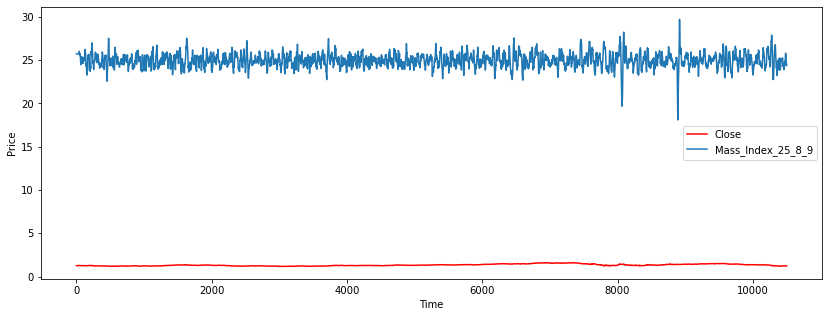

In [61]:
INICIO = 0
FIN = 10500
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Mass_Index_25_8_9'][INICIO:FIN], label = 'Mass_Index_25_8_9')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

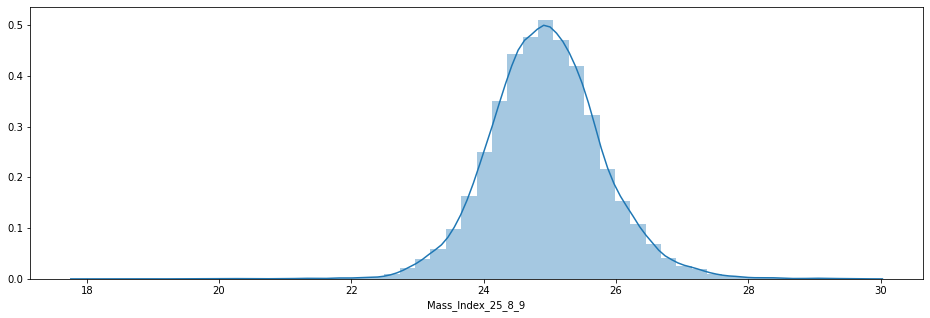

In [62]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Mass_Index_25_8_9']);

In [63]:
DATASET_FULL.shape

(26494, 69)

In [64]:
ADD_TA_FEATURES = True

if (ADD_TA_FEATURES):

    # https://github.com/bukosabino/ta/blob/master/examples_to_use/all_features_example.py
    import ta
    DATASET_FULL = ta.add_all_ta_features(DATASET_FULL, "Open", "High", "Low", "Close", "Volume", fillna=True)



In [65]:
DATASET_FULL.shape

(26494, 144)

In [66]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,2004-01-01 00:00:00,1.25950,1.25965,1.25826,1.25869,19408.8998,1.25934,1.25953,1.25814,1.25854,...,0.000000,30.935252,30.935252,-69.064748,0.000000,1.258690,0.000000,-0.422734,0.000000,0.000000
1,2004-01-01 04:00:00,1.25908,1.25960,1.24698,1.25910,41634.6001,1.25898,1.25948,1.24679,1.25900,...,86.509636,95.659037,63.297144,-4.340963,0.000000,1.258882,0.000000,0.032574,0.032568,0.032574
2,2004-01-01 08:00:00,1.25900,1.25953,1.25723,1.25785,23757.6001,1.25884,1.25938,1.25709,1.25775,...,78.111588,85.793212,70.795834,-14.206788,0.000000,1.258416,0.000000,-0.099277,-0.099327,-0.066736
3,2004-01-01 12:00:00,1.25785,1.26052,1.25727,1.25911,25753.3003,1.25775,1.26035,1.25710,1.25897,...,74.539877,89.586411,90.346220,-10.413589,0.000000,1.258725,0.000000,0.100171,0.100121,0.033368
4,2004-01-01 16:00:00,1.25905,1.25968,1.25371,1.25461,234854.4999,1.25890,1.25958,1.25357,1.25451,...,60.634548,56.351551,77.243725,-43.648449,0.000000,1.257113,0.000000,-0.357395,-0.358035,-0.324147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26489,2020-05-29 08:00:00,1.11051,1.11420,1.10962,1.11354,74257.9698,1.11049,1.11417,1.10959,1.11352,...,70.534370,96.823869,96.552777,-3.176131,0.012410,1.107160,1.068281,0.270139,0.269775,-11.531831
26490,2020-05-29 12:00:00,1.11355,1.11452,1.10944,1.11070,113196.9590,1.11354,1.11451,1.10940,1.11067,...,64.216867,81.895735,91.312170,-18.104265,0.012677,1.107672,1.265477,-0.255042,-0.255368,-11.757462
26491,2020-05-29 16:00:00,1.11069,1.11112,1.10811,1.10998,54751.2294,1.11067,1.11111,1.10809,1.10997,...,56.909494,76.067475,84.929026,-23.932525,0.012556,1.107986,0.930211,-0.064824,-0.064845,-11.814664
26492,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,...,62.729783,78.559370,78.840860,-21.440630,0.012424,1.108467,0.818742,0.065767,0.065745,-11.756668


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [67]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = 'R-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

R-EURUSD_FULL_4H_144F.csv


In [68]:
DATASET_FULL.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid',
       ...
       'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ao', 'momentum_kama', 'momentum_roc', 'others_dr',
       'others_dlr', 'others_cr'],
      dtype='object', length=144)

In [69]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados-regression/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)

In [70]:
filename_path

'C:\\Users\\maw\\Documents\\ITESO\\forex_prediction\\Jupyter Notebooks\\IDI4\\dataset_regression\\Adding Features\\../../../../Datasets/Junio2020/procesados-regression/R-EURUSD_FULL_4H_144F.csv'